Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1)Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

2) Split the dataset into a training set (70%) and a test set (30%).

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [15]:
X_train.shape,X_test.shape

((212, 13), (91, 13))

3) Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

4) Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [17]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
y_pred=rfc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(accuracy)
print(precision)
print(recall)
print(f1)


0.8131868131868132
0.8367346938775511
0.82
0.8282828282828283


5) Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

In [18]:
importance=rfc.feature_importances_
indices=np.argsort(importance)[::-1]
top_features=X_train.columns[indices[:5]]
print(top_features)


Index(['ca', 'cp', 'thalach', 'oldpeak', 'thal'], dtype='object')


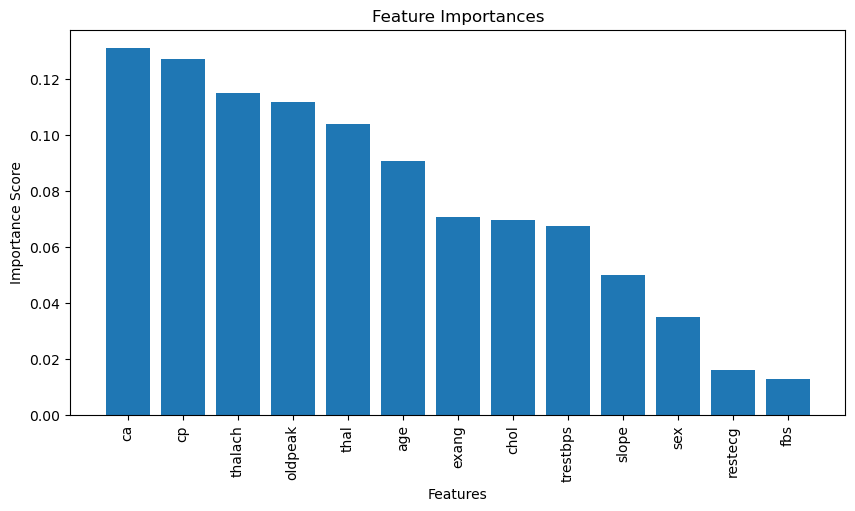

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(len(importance)), importance[indices])
plt.xticks(range(len(importance)), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

6) Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[5,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

rfc_grid=GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid=param_grid,cv=5,scoring='accuracy')
rfc_grid.fit(X_train,y_train)
print(rfc_grid.best_params_)
print(rfc_grid.best_score_)


{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.8440753045404208


In [32]:
import random
from random import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist={
    'n_estimators':[50,100,200],
    'max_depth':[5,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

rfc_rand=RandomizedSearchCV(RandomForestClassifier(random_state=42),
                            param_distributions=param_dist,n_iter=50,cv=5,scoring='accuracy',random_state=42)
rfc_rand.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [33]:
print(rfc_rand.best_params_)
print(rfc_rand.best_score_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}
0.8440753045404208


7) Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

In [34]:
best_params=rfc_grid.best_params_
rfc_tunned=RandomForestClassifier(random_state=42, **best_params)
rfc_tunned.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

In [37]:
y_pred_tunned=rfc_tunned.predict(X_test)
accuracy_tunned=accuracy_score(y_test,y_pred_tunned)
recall_tunned=recall_score(y_test,y_pred_tunned)
precision_tunned=precision_score(y_test,y_pred_tunned)
f1_tunned=f1_score(y_test,y_pred)
print(accuracy_tunned)
print(recall_tunned)
print(precision_tunned)
print(f1_tunned)

0.8351648351648352
0.88
0.8301886792452831
0.8282828282828283


8) Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [ ]:
feature_names = X.columns.tolist()
importances = rfc_tunned.feature_importances_
idx = np.argsort(importances)[::-1][:2]
feat1, feat2 = feature_names[idx[0]], feature_names[idx[1]]
xx, yy = np.meshgrid(np.linspace(X_test[feat1].min()-0.1, X_test[feat1].max()+0.1, 100),
                     np.linspace(X_test[feat2].min()-0.1, X_test[feat2].max()+0.1, 100))
Z = rfc_tunned.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_test[feat1], X_test[feat2], c=y_test, cmap='viridis')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.show()